In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[-0.26341589, -1.62636718],
       [ 1.92234568, -0.00915845],
       [-0.66059129, -1.09431412],
       ...,
       [ 1.00239773,  0.24222949],
       [ 0.03833385, -1.18961552],
       [ 0.64475331, -0.0842655 ]])

In [6]:
y

array([-1.43543955e+02,  5.37143805e+01, -1.12422301e+02,  3.42629838e+01,
       -7.38078130e+01, -1.05948172e+02, -1.70910855e+02,  7.43012844e+01,
       -4.29657669e+01, -7.18145418e+01, -1.03620781e+02,  1.01834934e+02,
       -7.02641717e+01,  1.27222074e+02, -7.50127602e-01,  7.47448064e+00,
        2.21863472e+02, -2.26313081e+02, -2.72643291e+01,  1.88588314e+01,
       -5.63944888e+01,  1.10169652e+02,  1.31633257e+02,  9.22667087e+01,
        2.33466485e+01, -1.73098378e+01, -1.03179901e+01,  3.12593915e+01,
       -5.44017461e+01,  6.11869532e+00,  2.91313853e+01, -1.11646333e+02,
       -3.16202554e+01,  1.08698967e+02, -5.06567718e+01,  8.44477041e+01,
       -9.37910306e+01, -2.80889917e+01, -8.84479719e+01,  5.20653300e+01,
        6.78324886e+01, -1.22858888e+02,  2.22795185e+01,  3.26722037e+01,
        1.41367779e+02,  9.37834473e+00,  5.17323519e+01,  8.34755604e+01,
        2.07026833e+01,  1.55017150e+01, -1.86879403e+02,  6.88606462e+01,
        2.20301860e+01, -

In [7]:
pd.DataFrame(X)[0]

0     -0.263416
1      1.922346
2     -0.660591
3     -0.856785
4     -1.929241
         ...   
995    0.017360
996   -1.637267
997    1.002398
998    0.038334
999    0.644753
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

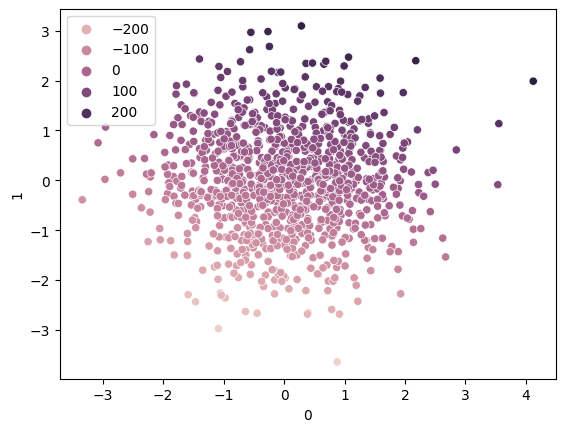

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[26.56820935, 83.72790532]])

In [14]:
# Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([ -75.59694404,  -27.9009608 ,   27.60406949,  104.15300871,
        235.03664284,  -61.94994453,  -39.6725149 ,  -69.30492197,
        100.52885759,   48.74649044, -142.73240686,  -94.45413823,
       -163.51603221,   35.25281807,   15.81826157,  -48.76416412,
         86.60373607,  -59.17532374,   43.47820665,  -77.59161454,
         23.32064216,  -56.487056  ,  -18.45422024,   -9.11814873,
        -21.35751676,  218.16259075,   80.67707802,   39.74098804,
        -64.82539972, -107.17473427,  -21.15162921,   -9.73407574,
         52.61659913,   35.36555703, -120.62425407,   12.67190647,
        -20.81911338,  -83.03214438,   44.91545268,   84.45072126,
        -18.90816922,    6.61079164,  -58.1791648 ,   -5.16953335,
        -55.18644683,   59.26753988,   65.19496205,  -57.77182212,
          3.77448297,  134.97278747,   27.28287858,  -87.46424401,
          8.80202454,  275.84418751,   77.30861674, -102.10774283,
        -81.68804871,   85.1709013 ,  -24.36122139,  132.77309

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y_pred,y_test))

0.9987671152285572


### Hyperparameter Tuning With SVR

In [19]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [23]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1975.151 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1840.170 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1451.805 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1495.824 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1777.936 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1975.151 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1840.170 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1451.805 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1495.824 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1777.936 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [25]:
y_pred4=grid.predict(X_test)
print(r2_score(y_pred4,y_test))

0.9988183697757184


In [26]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}